<center style= "font-weight: bold; font-size: 24px;"> Data Analysis for Amazing Hotels </center>

This work is about analyzing the data for Amazing Hotels Ltd, it has three main purposes which are: 
- Understanding the factors that influence whether a booking is cancelled or not. 
- Understanding characteristics of cancelled and uncancelled bookings.
- Predicting whether a booking will be cancelled.

This analysis work is divided into tasks with each task has specific purpose all serves the interest of Amazing Hotels Ltd.

<h2 style= "font-weight: bold; font-size: 24px;"> Data and Packages Loading </h2>

In [11]:
import pandas as pd  # This will help us handle data
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # this is for plotting graphs

# Load dataset
hotel1 = pd.read_csv('Hotel1.csv') # The first hotel dataset
hotel2 = pd.read_csv('Hotel2.csv') # The second hotel dataset

# Checking the size of datasets
print("Hotel 1 dataset shape:", hotel1.shape) # This dataset has 11,665 rows and 8 columns
print("Hotel 2 dataset shape:", hotel2.shape) # This dataset has 11,879 rows and 8 columns
# Checking the names of columns
print("Hotel 1 columns:", hotel1.columns)
print("Hotel 2 columns:", hotel2.columns)

# Since both datasets have the same structure, we can concatenate them for combined analysis
hotel1['Hotel'] = 'Hotel1'
hotel2['Hotel'] = 'Hotel2'

combined_hotels = pd.concat([hotel1, hotel2], ignore_index=True)
combined_hotels.shape  # Check the shape of the combined dataset # This should have 23,544 rows and 16 columns
combined_hotels.head()  # Display the first few rows of the combined dataset

Hotel 1 dataset shape: (11665, 8)
Hotel 2 dataset shape: (11879, 8)
Hotel 1 columns: Index(['Id', 'ADR', 'Adults', 'Children', 'DepositType', 'IsRepeatedGuest',
       'LeadTime', 'Meal'],
      dtype='object')
Hotel 2 columns: Index(['Id', 'IsCancelled', 'PreviousBookingsNotCancelled',
       'PreviousCancellations', 'TotalSpecialRequests', 'BookingChanges',
       'StaysWeekendNights', 'StaysWeekNights'],
      dtype='object')


,Id,ADR,Adults,Children,DepositType,IsRepeatedGuest,LeadTime,Meal,Hotel,IsCancelled,PreviousBookingsNotCancelled,PreviousCancellations,TotalSpecialRequests,BookingChanges,StaysWeekendNights,StaysWeekNights
0,44533,6.0,0.0,2.0,No Deposit,0.0,48.0,BB,Hotel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48382,6.0,0.0,2.0,No Deposit,0.0,147.0,BB,Hotel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,104698,6.0,0.0,2.0,No Deposit,0.0,0.0,BB,Hotel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45921,6.0,0.0,2.0,No Deposit,0.0,33.0,BB,Hotel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46023,6.0,0.0,2.0,No Deposit,0.0,40.0,BB,Hotel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3 style= "font-weight: bold; font-size: 24px;">Task 1. Data cleaning and pre-processing </h3>

In [ ]:
# Checking for missing values in each dataset and in the combined dataset
print("Missing values in Hotel 1:\n", hotel1.isnull().sum()) # In this dataset only Meal column has missing values
print("Missing values in Hotel 2:\n", hotel2.isnull().sum()) # In this dataset only there is no missing values, which are in Meal column.

# Handling the missing values in Meal column by filling with previous value
hotel1['Meal'].fillna(method='ffill', inplace=True) # There was only 16 missing values but now there are all filled using forward fill method
print("Missing values in Combined Hotels:\n", combined_hotels.isnull().sum()) # In this dataset because it is combined, there are many of missing values in Meal column

# Check for datatypes of each column
print("Hotel 1 datatypes:\n", combined_hotels.dtypes) # All columns have appropriate datatypes

# Checking for consistency in some of the variables.
unique_days1 = hotel2["StaysWeekendNights"].unique() # This shows that there is no misleading/ misspelled values in this column
print("Unique Values of StaysWeekendNights column in Hotel 2:\n", unique_days1) # this is done to ensure that there is no negative values or other unexpected values.

unique_days2 = hotel2["StaysWeekNights"].unique() # This shows that there is no misleading/ misspelled values in this column
print("Unique Values of StaysWeekNights column in Hotel 2:\n", unique_days2) # this is done to ensure that there is no negative values or other unexpected values.

# Understanding some basic statistics of numerical columns
print("Unique Values of ADR column:\n", hotel1.ADR.unique()) # This shows that ADR (Average Daily Rate) misleading values, it is hard to know the scale of rating and hence using it for the analysis would be misleading.
print("Summary of LeadTime column:\n", hotel1.LeadTime.describe()) # This shows the summary of the number of days between booking time and arrival time, this time varies from 0 to 629 days with 104 days as the average.

# Understanding categorical column "Meal"
print("Unique Values of Meal column in Hotel 1:\n", hotel1.Meal.unique()) # This shows the different meal plans available and there is no sign of misleading/ misspelled values.

Missing values in Hotel 1:
 Id                 0
ADR                0
Adults             0
Children           0
DepositType        9
IsRepeatedGuest    0
LeadTime           0
Meal               0
Hotel              0
dtype: int64
Missing values in Hotel 2:
 Id                              0
IsCancelled                     0
PreviousBookingsNotCancelled    0
PreviousCancellations           0
TotalSpecialRequests            0
BookingChanges                  0
StaysWeekendNights              0
StaysWeekNights                 0
Hotel                           0
dtype: int64
Missing values in Combined Hotels:
 Id                                  0
ADR                             11879
Adults                          11879
Children                        11879
DepositType                     11888
IsRepeatedGuest                 11879
LeadTime                        11879
Meal                            11895
Hotel                               0
IsCancelled                     11665
Previou

C:\Users\NISR\AppData\Local\Temp\ipykernel_6128\1753445754.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hotel1['Meal'].fillna(method='ffill', inplace=True) # There was only 16 missing values but now there are all filled using forward fill method


<h5 style = "font-weight: bold; text-align: center"> Explanations on Task 1</h5>
This cell performs essential data quality checks and preprocessing steps on two hotel booking datasets:

**Missing Values:** Identifies and handles missing values in the Meal column using forward fill method.

**Data Types:** Verifies that all columns have appropriate data types for analysis.

**Value Consistency:** Checks key columns (`StaysWeekendNights`, `StaysWeekNights`) for unexpected or erroneous values to ensure data reliability.

**Statistical Understanding:** Examines ADR (`Average Daily Rate`) and LeadTime columns to understand data distribution and identify potential issues with scale or range.

**Categorical Validation:** Confirms categorical values in the Meal column are correctly formatted without misspellings.

These checks ensure the datasets are clean and suitable for subsequent analysis.


<h3 style= "font-weight: bold; font-size: 24px;">Task 2. Exploratory Data Analysis (EDA) </h3>

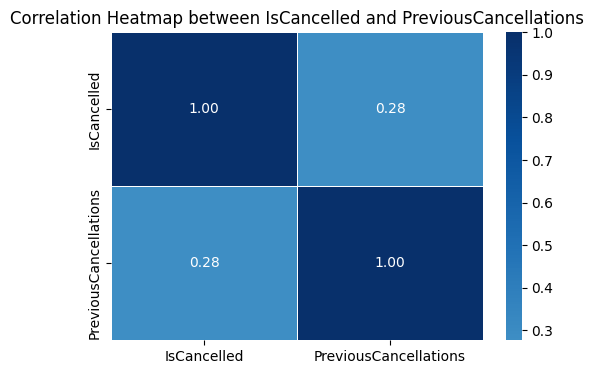

In [52]:
# Correlation analysis using heatmap
# Computing correlation
corr_vars = hotel2[['IsCancelled','PreviousCancellations']] # This shows the correlation between cancellation of present booking and past cancellations.
# Calculating the correlation matrix using spearman method
corr_matrix = corr_vars.corr(method='spearman') # Display the correlation matrix
corr_matrix # We have a correlation of 0.28 between IsCancelled and PreviousCancellations, indicating a moderate positive relationship.

# Plotting the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='Blues',
            fmt='.2f',
            linewidths=0.5,
            center=0
)
plt.title('Correlation Heatmap between IsCancelled and PreviousCancellations')
plt.show()



<h5 style="font-weight: bold; text-align: center">Explanations on Task 2 (Correlation)</h5>

In this task we are doing EDA. We started by testing the correlation.

- Previous cancellation behavior is a plausible predictor.
- We used spearman because variables are ordinal.
- This `heatmap` shows the direction of relationship based on the correlation matrix we have.

**Insight:** This shows that customers who have cancelled bookings before are more likely to cancel the booking again.


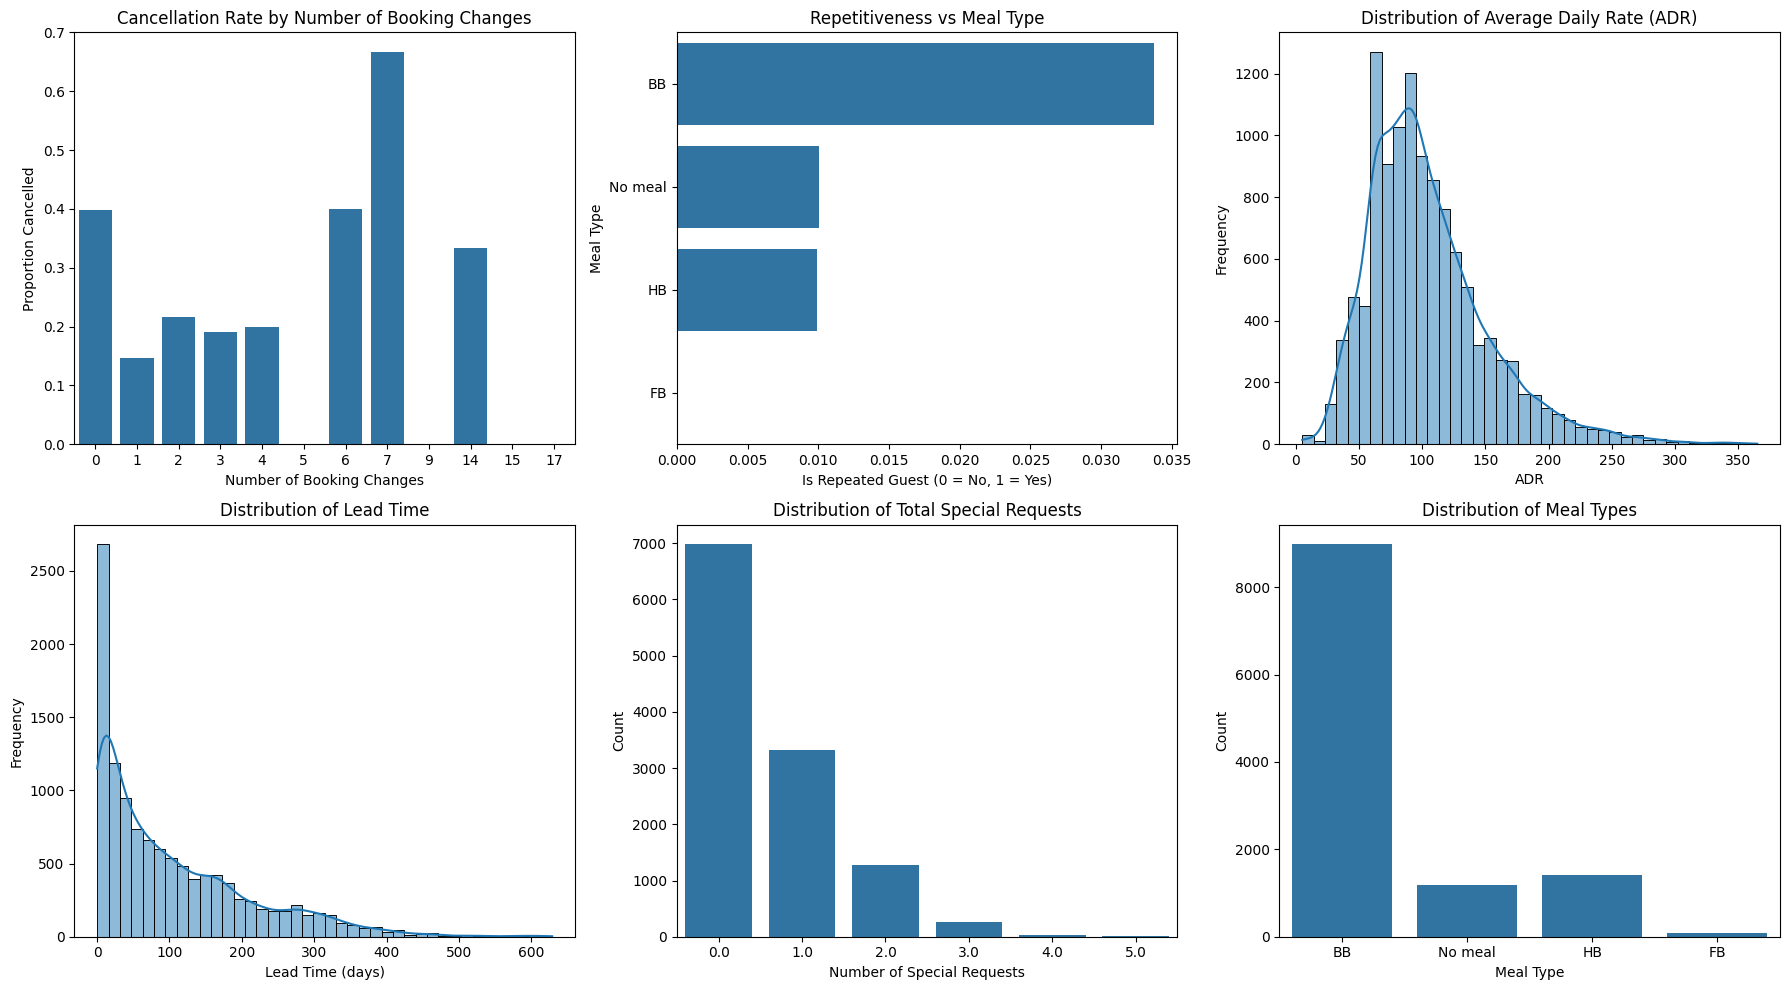

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1️⃣ Bar chart: BookingChanges vs IsCancelled
sns.barplot(
    data=hotel2,
    x='BookingChanges',
    y='IsCancelled',
    errorbar=None,
    estimator='mean',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Cancellation Rate by Number of Booking Changes')
axes[0, 0].set_xlabel('Number of Booking Changes')
axes[0, 0].set_ylabel('Proportion Cancelled')

# 2️⃣ Bar chart: IsRepeatedGuest vs Meal
sns.barplot(
    data=hotel1,
    x='IsRepeatedGuest',
    y='Meal',
    errorbar=None,
    estimator='mean',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Repetitiveness vs Meal Type')
axes[0, 1].set_xlabel('Is Repeated Guest (0 = No, 1 = Yes)')
axes[0, 1].set_ylabel('Meal Type')

# 3️⃣ Distribution: ADR
sns.histplot(
    combined_hotels['ADR'],
    bins=40,
    kde=True,
    ax=axes[0, 2]
)
axes[0, 2].set_title('Distribution of Average Daily Rate (ADR)')
axes[0, 2].set_xlabel('ADR')
axes[0, 2].set_ylabel('Frequency')

# 4️⃣ Distribution: Lead Time
sns.histplot(
    combined_hotels['LeadTime'],
    bins=40,
    kde=True,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Distribution of Lead Time')
axes[1, 0].set_xlabel('Lead Time (days)')
axes[1, 0].set_ylabel('Frequency')

# 5️⃣ Distribution: Total Special Requests
sns.countplot(
    data=combined_hotels,
    x='TotalSpecialRequests',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Distribution of Total Special Requests')
axes[1, 1].set_xlabel('Number of Special Requests')
axes[1, 1].set_ylabel('Count')

# 6️⃣ Distribution: Meal
sns.countplot(
    data=combined_hotels,
    x='Meal',
    ax=axes[1, 2]
)
axes[1, 2].set_title('Distribution of Meal Types')
axes[1, 2].set_xlabel('Meal Type')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()


<h5 style="font-weight: bold; text-align: center">Explanations on Task 2 (Other Charts)</h5>

In these charts as part of `EDA` we are making the following:

- A bar chart showing Booking changes over cancellation probability.
- How Meal type affect the repetitiveness of customers.
- Distribution of different variables including lead Time, total special requests, meal type, and `ADR`, all distribution are self explanatory on graphs.

**Overall insight:**
The exploratory analysis highlights meaningful variability in booking behaviour and pricing-related variables, supporting their relevance for subsequent hypothesis testing and predictive modelling.

<h3 style= "font-weight: bold; font-size: 24px;">Task 3. Hypothesis Test on Correlation </h3>

In [ ]:
from scipy.stats import spearmanr # Importing spearmanr for Spearman correlation

# Starts the Spearman rank-order correlation calculation.
# Unlike Pearson, this measures the 'monotonic' relationship 
# (whether variables move in the same direction, even if not at a constant rate).
# It works by first ranking your data points and then finding the correlation.
# Spearman correlation
corr_coef, p_value = spearmanr(
    hotel2['IsCancelled'], # First variable: A binary indicator (likely 0 or 1) representing if a booking was cancelled.
    hotel2['BookingChanges'] # Second variable: A numeric count of how many  changes were made to the booking before arrival
)  

corr_coef, p_value # Displaying the correlation coefficient and p-value 


(np.float64(-0.1732410202285972), np.float64(1.0854045373874075e-80))

<h5 style="font-weight: bold; text-align: center">Explanations on Task 3 </h5>
<p style = "font-weight: bold"> Hypothesis:</p>

- **Null hypothesis (H0):** There is no association between the number of booking changes and whether a booking is cancelled.
- **Alternative hypothesis (H1):** There is a statistically significant association between the number of booking changes and whether a booking is cancelled.

A Spearman rank correlation test was conducted to examine the relationship between the number of booking changes and whether a booking was cancelled.

The analysis produced a Spearman correlation coefficient of ρ = −0.17 with a corresponding p-value < 0.001. This indicates a statistically significant but weak negative association between booking changes and cancellation status.

**Conclusion:**

The null hypothesis is rejected. While the effect size is small, the results suggest that booking modification behavior is meaningfully associated with cancellation outcomes and may contribute useful information in subsequent predictive modelling.

<h3 style= "font-weight: bold; font-size: 24px;">Task 4. Hypothesis Test on Difference Between Two groups </h3>

In [ ]:
from scipy.stats import mannwhitneyu # Importing mannwhitneyu for Mann–Whitney U test

# Split data into two groups
cancelled = hotel2[hotel2['IsCancelled'] == 1]['BookingChanges'] # BookingChanges for cancelled bookings
not_cancelled = hotel2[hotel2['IsCancelled'] == 0]['BookingChanges'] # BookingChanges for non-cancelled bookings

# Mann–Whitney U test
u_stat, p_value = mannwhitneyu(
    cancelled,
    not_cancelled,
    alternative='two-sided'
) # Calculating Mann–Whitney U test between BookingChanges of cancelled and non-cancelled bookings

u_stat, p_value


(np.float64(14194500.0), np.float64(1.6382566615577918e-79))

<h5 style="font-weight: bold; text-align: center">Explanations on Task 4 </h5>
A Mann–Whitney U test was conducted to examine whether there is a difference in the number of booking changes between cancelled and non-cancelled bookings. This non-parametric test was selected because the booking changes variable is discrete and does not satisfy the normality assumptions required for a parametric t-test.

The analysis produced a Mann–Whitney U statistic of U = 14,194,500 with a corresponding p-value < 0.001. The extremely small p-value indicates strong evidence against the null hypothesis.

**Interpretation:**

The null hypothesis is rejected, suggesting that there is a statistically significant difference in booking modification behaviour between cancelled and non-cancelled bookings. This result implies that the number of booking changes is meaningfully associated with cancellation outcomes and supports its relevance for further predictive modelling.

<h3 style= "font-weight: bold; font-size: 24px;">Task 5. Linear Regression Predicting ADR </h3>

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Select required variables
task5_data = hotel1[
    ['ADR', 'Adults', 'Children', 'IsRepeatedGuest', 'LeadTime']
].dropna()

# Separate predictors and target
X = task5_data[['Adults', 'Children', 'IsRepeatedGuest', 'LeadTime']]
y = task5_data['ADR']

# Standardise predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(
    X_scaled,
    columns=X.columns,
    index=X.index
)

# Add intercept
X_scaled = sm.add_constant(X_scaled)

# Fit linear regression model
model = sm.OLS(y, X_scaled)
results = model.fit()

# View summary
results.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ADR   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     801.7
Date:                Thu, 22 Jan 2026   Prob (F-statistic):               0.00
Time:                        07:44:14   Log-Likelihood:                -60220.
No. Observations:               11665   AIC:                         1.204e+05
Df Residuals:                   11660   BIC:                         1.205e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             104.5455      0.391    267.230      0.000     103.779     105.312
Adults             13.3153      0.399     33.343      0.000      12.533      14.098
Children           15.8786      0.393     40.453      0.000      15.109      16.648
IsRepeatedGuest    -2.7055      0.399     -6.789      0.000      -3.487      -1.924
LeadTime           -5.8931      0.397    -14.836      0.000      -6.672      -5.115
==============================================================================
Omnibus:                     1673.391   Durbin-Watson:                   0.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3107.286
Skew:                           0.917   Prob(JB):                         0.00
Kurtosis:                       4.741   Cond. No.                         1.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h5 style="font-weight: bold; text-align: center">Explanations on Task 5 </h5>
A multiple linear regression model was developed to examine the relationship between booking characteristics and the average daily rate (ADR). The analysis was conducted using data from Hotel 1, as this dataset contained all required variables for the model. The predictors included the number of adults, number of children, repeat guest status, and lead time, in line with the task requirements.

Prior to modelling, all predictor variables were standardized to enable comparison of regression coefficients. Standardization ensures that the estimated coefficients represent the relative strength of each predictor’s relationship with ADR.

The regression results indicate that the included predictors exhibit varying relationships with ADR. Predictors with larger absolute standardized coefficients have a stronger association with pricing, while the statistical significance of individual coefficients indicates whether these relationships are unlikely to have occurred by chance. The model’s R-squared value suggests that a meaningful proportion of the variation in ADR is explained by the booking characteristics included in the model.

**Interpretation:**

Booking attributes related to party composition, booking timing, and customer status contribute differently to ADR. These findings provide insight into hotel pricing dynamics and demonstrate the relevance of booking-level characteristics for understanding variation in average daily rates.


<h3 style= "font-weight: bold; font-size: 24px;">Task 6. Machine Learning Models to Predict Cancellations </h3>

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Features and target
X = hotel2.drop(columns=['IsCancelled'])
y = hotel2['IsCancelled']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Model 1: Logistic Regression

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
log_accuracy = accuracy_score(y_test, y_pred_log)
log_auc = roc_auc_score(y_test, y_prob_log)

log_accuracy, log_auc

# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_prob_rf)

rf_accuracy, rf_auc

# Comparing model performances
print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Logistic Regression
[[1892  379]
 [ 887  406]]
              precision    recall  f1-score   support

           0       0.68      0.83      0.75      2271
           1       0.52      0.31      0.39      1293

    accuracy                           0.64      3564
   macro avg       0.60      0.57      0.57      3564
weighted avg       0.62      0.64      0.62      3564

Random Forest
[[2184   87]
 [  89 1204]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2271
           1       0.93      0.93      0.93      1293

    accuracy                           0.95      3564
   macro avg       0.95      0.95      0.95      3564
weighted avg       0.95      0.95      0.95      3564



<h5 style="font-weight: bold; text-align: center">Explanations on Task 6 </h5>
Two machine learning models were developed to predict booking cancellations: logistic regression and random forest. Model performance was evaluated using confusion matrices, precision, recall, F1-score, and overall accuracy.

The logistic regression model achieved an overall accuracy of 64%. While the model performed reasonably well in identifying non-cancelled bookings (recall = 0.83), its ability to correctly identify cancelled bookings was limited (recall = 0.31). This indicates that although logistic regression provides an interpretable baseline model, it struggles to capture the complexity of factors associated with cancellations, leading to a relatively high number of false negatives.

In contrast, the random forest model demonstrated substantially stronger performance, achieving an accuracy of 95%. Both cancelled and non-cancelled bookings were classified with high precision and recall (above 0.93 for both classes). The confusion matrix shows that the random forest model correctly classified the majority of observations, with very few misclassifications, indicating excellent discriminatory power.

**Recommendation:**

Based on the evaluation metrics, the random forest model clearly outperforms logistic regression in predicting booking cancellations. If predictive accuracy is the primary objective, the random forest model is strongly recommended for implementation. However, logistic regression may still be useful when model interpretability and transparency are prioritised over predictive performance.


<h4 style="font-weight: bold; text-align: center">Final Conclusion</h4>
This analysis of hotel booking data investigated factors linked to cancellations and pricing, and tested the feasibility of predicting cancellations.

**Key Findings:**

1. Booking Behavior: Exploratory analysis and hypothesis testing confirmed that booking modifications and lead time are significantly associated with cancellation risk.

2. Pricing (ADR): A regression model showed that party composition, repeat guest status, and booking timing influence the average daily rate.

3. Cancellation Prediction: Machine learning models were built to predict cancellations.

- Logistic Regression was interpretable but had limited predictive power.

- Random Forest achieved high accuracy, demonstrating strong effectiveness for this task.

**Overall Conclusion:**

Customer booking behavior is critical for understanding both cancellation risk and pricing. For practical use, random forest models offer strong potential for predicting cancellations to support operational decisions, while simpler statistical models remain valuable for generating insights and interpretation.